In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Read in the data
disaster = pd.read_csv('data/disaster.csv')

In [47]:
# Cleaning text data
def preprocess(text):
    text = text.lower() # make text lowercase
    text=  text.strip()  # takes away leading and training spaces
    text=  re.sub(r'<.*?>','', text) # removes html syntax
    text = re.sub(r'[^\w\s]','',text) # removes special punctuation characters
    text = re.sub(r'\[[0-9]*\]',' ',text) # removes references
    text = re.sub(r'\d',' ',text)  # removes numbers (digits)
    text = re.sub(r'\s+', ' ', text) # collapse multiple spaces into a single space
    return text

In [48]:
# Apply string cleaning to text variable
disaster['clean_text'] = disaster['text'].apply(preprocess)

In [49]:
disaster.head(10)

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed in both...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area


# Remove stop words (example: and, the)


In [55]:
# Proof that Tfid vectorizer excludes topwords
stop_words_ex = ["On March 5th, I will crush my capstone presentation with my awesome team."]

vectorizer_english = TfidfVectorizer(stop_words = "english")
vectorizer_english.fit_transform(stop_words_ex)

print("Remainin words")
print(vectorizer_english.get_feature_names_out())

Remainin words
['5th' 'awesome' 'capstone' 'crush' 'march' 'presentation' 'team']


# Lemmatization
This would be the next step but the library conflicts with our environment

This is a process that would simplify words to their most basic form

ex. greater --> great

# Logistic Regression

TFIDG allows us to basically encode (vectorize) the most common words in our data

In [57]:
# Split test and train data
X_train, X_test, y_train, y_test = train_test_split(disaster["clean_text"],
                                                    disaster['target'],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [58]:
# Vectorize words
tfidf_vectorizer = TfidfVectorizer(stop_words = "english")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [61]:
# Initialize a logistic regression and fit to vectorized training data
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_tfidf, y_train)
y_pred = lr_model.predict(X_test_tfidf)

Accuracy 0.803415061295972


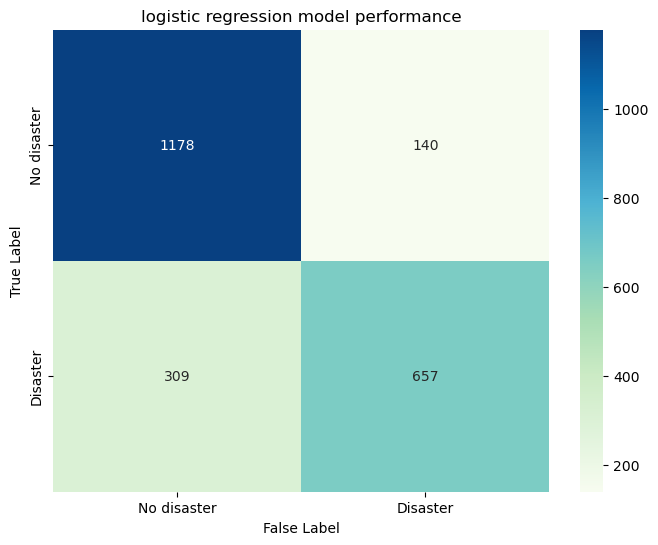

In [64]:
# Calculate LR accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)

# Create confusion matrix for correctly/incorrectly predicting outcome variable
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "GnBu",
            xticklabels = ["No disaster", "Disaster"],
            yticklabels =  ["No disaster", "Disaster"])
plt.title("logistic regression model performance")
plt.ylabel('True Label')
plt.xlabel('False Label')
plt.show()

Test model with new data

In [67]:
# Preprocess new phrases
new_text = [
    "Breaking: massive earthquake hits coast",
    "I love watching disaster movies on Netflix",
    "Thousands evacuated as hurricane approaches",
    "Theeees is a disssaster",
    "It's Windy",
    "The palisade fire has damaged over 7000 structures",
    "I dropped my pencil and I'm mtoo lazy to pick it up myself",
    "What about the MEG?!?!"
]


# Transform and clean
cleaned_new_text = [preprocess(text) for text in new_text]

# Transform using TF-IDF vectorizer
new_features = tfidf_vectorizer.transform(cleaned_new_text)

# Predictions
predictions = lr_model.predict(new_features)

# Check outcomes
for text, pred in zip(new_text, predictions):
    print("Text: ", text)
    print(f"Prediction: {'Real Disaster' if pred == 1 else 'Not a real disaster'}\n")

Text:  Breaking: massive earthquake hits coast
Prediction: Real Disaster

Text:  I love watching disaster movies on Netflix
Prediction: Not a real disaster

Text:  Thousands evacuated as hurricane approaches
Prediction: Real Disaster

Text:  Theeees is a disssaster
Prediction: Not a real disaster

Text:  It's Windy
Prediction: Not a real disaster

Text:  The palisade fire has damaged over 7000 structures
Prediction: Not a real disaster

Text:  I dropped my pencil and I'm mtoo lazy to pick it up myself
Prediction: Not a real disaster

Text:  What about the MEG?!?!
Prediction: Not a real disaster

